# **R Script for Gene Ontology Analysis**

#### **Parameters to be set by the user**

In [1]:
species <- 'Zebrafish' #'Mouse'

**Code**

In [2]:
.libPaths(c("~/R/x86_64-pc-linux-gnu-library/4.4", .libPaths())) #path to R

library('clusterProfiler')
library('ggplot2')
library('GOSemSim')

library('reticulate')
pd <- import("pandas")



clusterProfiler v4.14.4 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

S Xu, E Hu, Y Cai, Z Xie, X Luo, L Zhan, W Tang, Q Wang, B Liu, R Wang,
W Xie, T Wu, L Xie, G Yu. Using clusterProfiler to characterize
multiomics data. Nature Protocols. 2024, 19(11):3292-3320


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


GOSemSim v2.32.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Guangchuang Yu, Fei Li, Yide Qin, Xiaochen Bo, Yibo Wu and Shengqi
Wang. GOSemSim: an R package for measuring semantic similarity among GO
terms and gene products. Bioinformatics. 2010, 26(7):976-978



ERROR: No module named 'pandas'

In [34]:
# Or import list created in a python script

if (species == 'Mouse') { 
    annotation = 'GRCm39' 
} else if (species == 'Zebrafish') {
    annotation = 'GRCz11.113'
    }

#genes_to_test <- pd$read_pickle("../ZF_genome_Dcm_motifs/genes_high_dcm_counts.pkl")
#title <- paste0("GO results considering genes with Dcm occurrences superior \nto the 0.95 quantile of Dcm occurrences per gene in ", annotation) 
genes_to_test <- pd$read_pickle("../ZF_genome_Dcm_motifs/genes_low_dcm_counts.pkl")
title <- paste0("GO results considering genes with Dcm occurrences \ninferior to the 0.05 quantile of Dcm \noccurrences per gene in ", annotation) 

In [35]:
if (species == 'Zebrafish') {
    db = 'org.Dr.eg.db'
    } else if (species == 'Mouse') {
    db = 'org.Mm.eg.db' 
}
GO_results_BP <- enrichGO(gene = genes_to_test, OrgDb = db, keyType = "ENSEMBL", ont = "BP")
#as.data.frame(GO_results_BP)

**We can filter redundant terms based on selecting most significant terms (https://github.com/YuLab-SMU/clusterProfiler/issues/28)**

In [36]:
filtered_GO_results <- simplify(GO_results_BP, cutoff=0.5, by="p.adjust", select_fun=min)

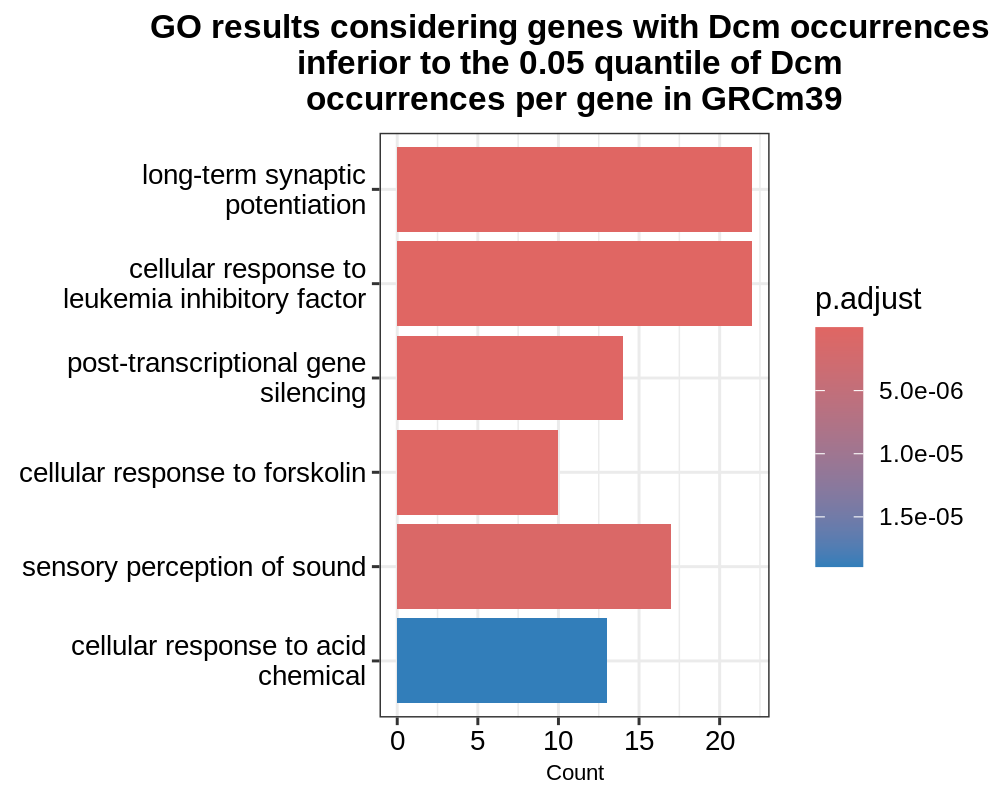

In [38]:
#GO_plot <- plot(barplot(GO_results_BP, showCategory = 20))
#png('Results_GO.png', res = 250, width = 1600, height = 3000)

# For 0.95 quantile:
#options(repr.plot.width = 6, repr.plot.height = 8, repr.plot.res = 300)

# For 0.05 quantile:
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 200)

GO_plot <- barplot(filtered_GO_results, showCategory = 20) +
ggtitle(title) +
  theme(
    plot.title = element_text(size = 12, face = "bold", hjust = 0.5),
    axis.text.x = element_text(size = 10),  
    axis.text.y = element_text(size = 10),  
    axis.title = element_text(size = 8)   
  )

plot(GO_plot)
